In [1]:
# Import library dan package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from kneed import KneeLocator

In [2]:
# Memuat dataset
df = pd.read_csv('heart.csv')
print("Menampilkan dataset: \n", df)
print("==========================================================")

Menampilkan dataset: 
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0   

In [3]:
# Pembersihan Data (memeriksa nilai yang hilang)
print("Memeriksa nilai yang hilang dalam dataset:")
print(df.isnull().sum())
print("==========================================================")

Memeriksa nilai yang hilang dalam dataset:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
# Memeriksa baris duplikat dalam dataset
print("Memeriksa baris duplikat dalam dataset:")
print(df.duplicated().sum())
print("==========================================================")

Memeriksa baris duplikat dalam dataset:
0


In [5]:
# Mengubah variabel kategorikal menjadi numerik
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

# Menampilkan dataset setelah diubah menjadi numerik
print("Dataset setelah variabel kategorikal diubah menjadi numerik:")
print(df.head())
print("==========================================================")

Dataset setelah variabel kategorikal diubah menjadi numerik:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [6]:
# Integrasi Data dan Analisis Deskriptif
print("Statistik deskriptif dari dataset:")
print(df.describe())
print("==========================================================")

Statistik deskriptif dari dataset:
              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.789760       0.781046  132.396514   198.799564   
std      9.432617    0.407701       0.956519   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.250000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.989107  136.809368        0.404139    0.887364   
std      0.423046    0.631671   25.460334        0.490992    1.066570   
min      0.0000

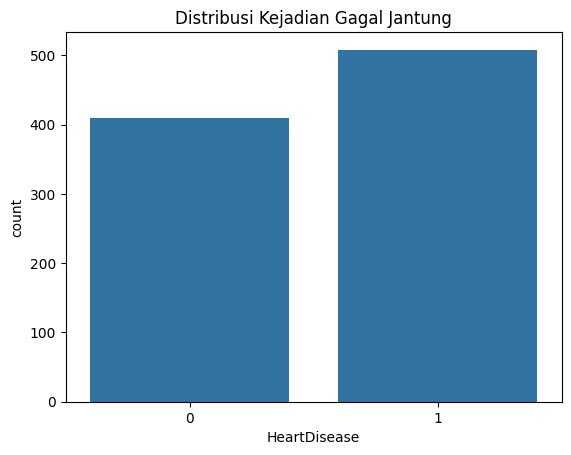

In [7]:
# Analisis Data Eksploratif (EDA)
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Kejadian Gagal Jantung')
plt.show()

In [8]:
# Menghitung distribusi kejadian gagal jantung
heart_disease_counts = df['HeartDisease'].value_counts()

# Menampilkan distribusi dalam bentuk angka
print("Distribusi Kejadian Gagal Jantung dalam Jumlah Angka:")
print(heart_disease_counts)

Distribusi Kejadian Gagal Jantung dalam Jumlah Angka:
HeartDisease
1    508
0    410
Name: count, dtype: int64


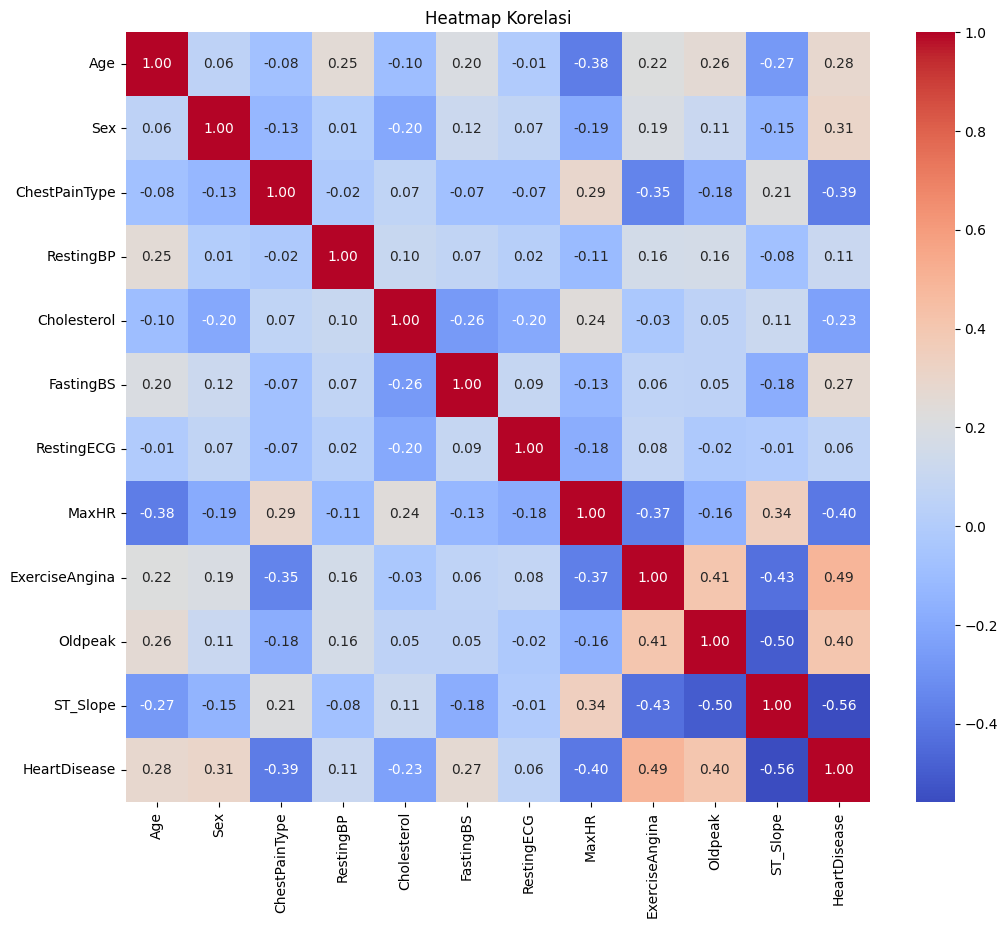

In [9]:
# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

In [10]:
# Eliminasi variabel dengan korelasi tinggi
threshold = 0.8
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_reduced = df.drop(columns=to_drop)
print("Dataset setelah eliminasi variabel dengan korelasi tinggi:")
print(df_reduced.head())
print("==========================================================")

Dataset setelah eliminasi variabel dengan korelasi tinggi:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


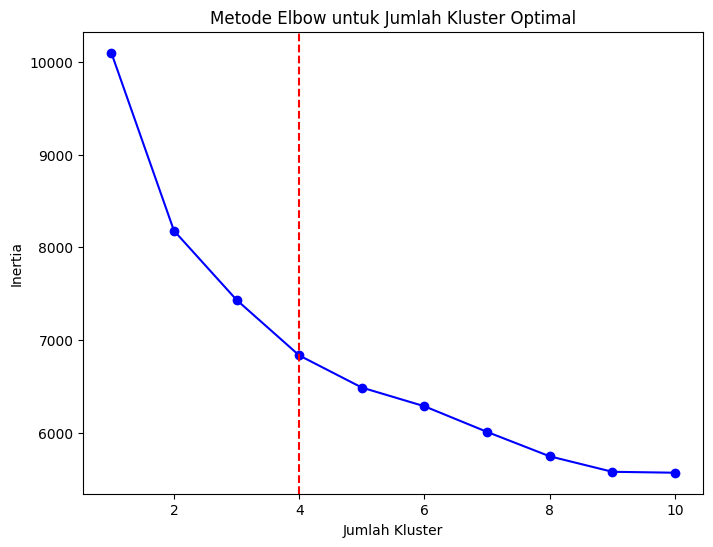

In [11]:
# Menentukan jumlah kluster optimal menggunakan metode elbow
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_reduced.drop(columns='HeartDisease'))

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Menentukan titik siku menggunakan KneeLocator dari library kneed
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.knee

# Plotting Elbow Method dengan garis merah untuk k optimal
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Jumlah Kluster Optimal')
plt.show()

In [12]:
# Memilih jumlah kluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Menambahkan informasi kluster ke dataset
df_reduced['Cluster'] = clusters

# Membagi data menjadi fitur dan variabel target
X = df_reduced.drop(columns='HeartDisease')
y = df_reduced['HeartDisease']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data yang telah di reduce
print("Isi dari data yang telah direduce dan menambahkan kolom cluster:")
print(df_reduced)
print("==========================================================")

Isi dari data yang telah direduce dan menambahkan kolom cluster:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0   

In [13]:
# Hyperparameter tuning untuk Decision Tree
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dtree, cv=5)
grid_search_dtree.fit(X_train, y_train)

# Hyperparameter tuning untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Akurasi': accuracy_score(y_test, y_pred),
        'Presisi': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Skor F1': f1_score(y_test, y_pred)
    }

# Evaluasi semua kombinasi parameter untuk Decision Tree
print("Decision Tree Evaluations:")
for params in grid_search_dtree.cv_results_['params']:
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    scores = evaluate_model(model, X_test, y_test)
    print(f"Parameters: {params}")
    print(f"Scores: {scores}")
    print("==========================================================")

# Evaluasi semua kombinasi parameter untuk SVM
print("SVM Evaluations:")
for params in grid_search_svm.cv_results_['params']:
    model = SVC(**params, random_state=42)
    model.fit(X_train, y_train)
    scores = evaluate_model(model, X_test, y_test)
    print(f"Parameters: {params}")
    print(f"Scores: {scores}")
    print("==========================================================")

Decision Tree Evaluations:
Parameters: {'criterion': 'gini', 'max_depth': None}
Scores: {'Akurasi': 0.75, 'Presisi': 0.8321678321678322, 'Recall': 0.725609756097561, 'Skor F1': 0.7752442996742671}
Parameters: {'criterion': 'gini', 'max_depth': 10}
Scores: {'Akurasi': 0.7572463768115942, 'Presisi': 0.8344827586206897, 'Recall': 0.7378048780487805, 'Skor F1': 0.7831715210355987}
Parameters: {'criterion': 'gini', 'max_depth': 20}
Scores: {'Akurasi': 0.75, 'Presisi': 0.8321678321678322, 'Recall': 0.725609756097561, 'Skor F1': 0.7752442996742671}
Parameters: {'criterion': 'gini', 'max_depth': 30}
Scores: {'Akurasi': 0.75, 'Presisi': 0.8321678321678322, 'Recall': 0.725609756097561, 'Skor F1': 0.7752442996742671}
Parameters: {'criterion': 'entropy', 'max_depth': None}
Scores: {'Akurasi': 0.7681159420289855, 'Presisi': 0.852112676056338, 'Recall': 0.7378048780487805, 'Skor F1': 0.7908496732026143}
Parameters: {'criterion': 'entropy', 'max_depth': 10}
Scores: {'Akurasi': 0.7644927536231884, 'Pr

In [14]:
# Print best parameters
print(f"Best parameters for Decision Tree: {grid_search_dtree.best_params_}")
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [15]:
# Membagi data menjadi set pelatihan dan pengujian (90% training, 10% testing)
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_90 = scaler.fit_transform(X_train_90)
X_test_10 = scaler.transform(X_test_10)

# Melakukan tuning dan evaluasi model seperti sebelumnya
# Hyperparameter tuning untuk Decision Tree
grid_search_dtree.fit(X_train_90, y_train_90)
grid_search_svm.fit(X_train_90, y_train_90)

# Evaluasi Decision Tree
best_dtree_90 = grid_search_dtree.best_estimator_
y_pred_dtree_90 = best_dtree_90.predict(X_test_10)
print("Laporan Klasifikasi - Pohon Keputusan (90%/10%)")
print(classification_report(y_test_10, y_pred_dtree_90))
print("==========================================================")

# Evaluasi SVM
best_svm_90 = grid_search_svm.best_estimator_
y_pred_svm_90 = best_svm_90.predict(X_test_10)
print("Laporan Klasifikasi - Mesin Vektor Pendukung (90%/10%)")
print(classification_report(y_test_10, y_pred_svm_90))
print("==========================================================")

Laporan Klasifikasi - Pohon Keputusan (90%/10%)
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.83      0.80      0.81        54

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.78      0.78      0.78        92

Laporan Klasifikasi - Mesin Vektor Pendukung (90%/10%)
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92



In [16]:
# Membagi data menjadi set pelatihan dan pengujian (70% training, 30% testing)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_70 = scaler.fit_transform(X_train_70)
X_test_30 = scaler.transform(X_test_30)

# Melakukan tuning dan evaluasi model seperti sebelumnya
# Hyperparameter tuning untuk Decision Tree
grid_search_dtree.fit(X_train_70, y_train_70)
grid_search_svm.fit(X_train_70, y_train_70)

# Evaluasi Decision Tree
best_dtree_70 = grid_search_dtree.best_estimator_
y_pred_dtree_70 = best_dtree_70.predict(X_test_30)
print("Laporan Klasifikasi - Pohon Keputusan (70%/30%)")
print(classification_report(y_test_30, y_pred_dtree_70))
print("==========================================================")

# Evaluasi SVM
best_svm_70 = grid_search_svm.best_estimator_
y_pred_svm_70 = best_svm_70.predict(X_test_30)
print("Laporan Klasifikasi - Mesin Vektor Pendukung (70%/30%)")
print(classification_report(y_test_30, y_pred_svm_70))
print("==========================================================")

Laporan Klasifikasi - Pohon Keputusan (70%/30%)
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       112
           1       0.83      0.74      0.78       164

    accuracy                           0.76       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.76      0.76       276

Laporan Klasifikasi - Mesin Vektor Pendukung (70%/30%)
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [17]:
# Membagi data menjadi set pelatihan dan pengujian (60% training, 40% testing)
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_60 = scaler.fit_transform(X_train_60)
X_test_40 = scaler.transform(X_test_40)

# Melakukan tuning dan evaluasi model seperti sebelumnya
# Hyperparameter tuning untuk Decision Tree
grid_search_dtree.fit(X_train_60, y_train_60)
grid_search_svm.fit(X_train_60, y_train_60)

# Evaluasi Decision Tree
best_dtree_60 = grid_search_dtree.best_estimator_
y_pred_dtree_60 = best_dtree_60.predict(X_test_40)
print("Laporan Klasifikasi - Pohon Keputusan (60%/40%)")
print(classification_report(y_test_40, y_pred_dtree_60))
print("==========================================================")

# Evaluasi SVM
best_svm_60 = grid_search_svm.best_estimator_
y_pred_svm_60 = best_svm_60.predict(X_test_40)
print("Laporan Klasifikasi - Mesin Vektor Pendukung (60%/40%)")
print(classification_report(y_test_40, y_pred_svm_60))
print("==========================================================")

Laporan Klasifikasi - Pohon Keputusan (60%/40%)
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       147
           1       0.85      0.73      0.78       221

    accuracy                           0.76       368
   macro avg       0.76      0.77      0.75       368
weighted avg       0.77      0.76      0.76       368

Laporan Klasifikasi - Mesin Vektor Pendukung (60%/40%)
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       147
           1       0.92      0.88      0.90       221

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368



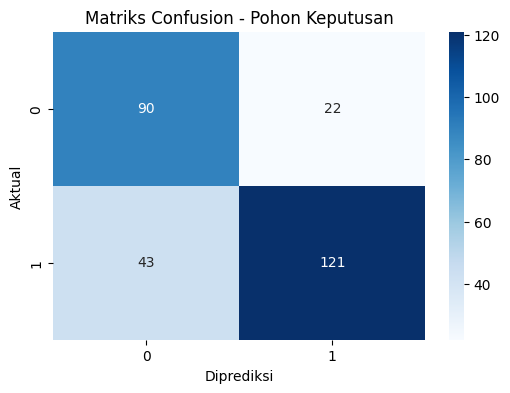

In [18]:
# Matriks Confusion untuk Pohon Keputusan
cm_dtree = confusion_matrix(y_test, grid_search_dtree.best_estimator_.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Confusion - Pohon Keputusan')
plt.xlabel('Diprediksi')
plt.ylabel('Aktual')
plt.show()

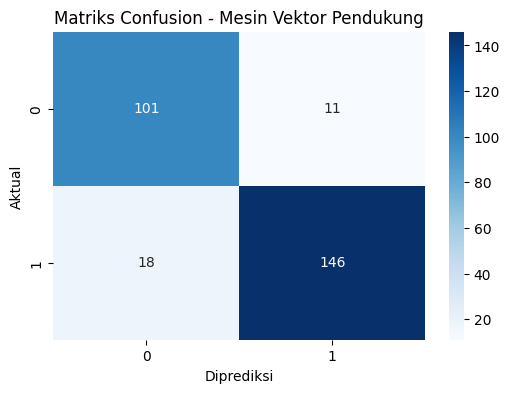

In [19]:
# Matriks Confusion untuk SVM
cm_svm = confusion_matrix(y_test, grid_search_svm.best_estimator_.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Confusion - Mesin Vektor Pendukung')
plt.xlabel('Diprediksi')
plt.ylabel('Aktual')
plt.show()

In [20]:
# Cross-Validation untuk evaluasi yang lebih andal (5 lipatan)
dtree_scores_5 = cross_val_score(grid_search_dtree.best_estimator_, X_train, y_train, cv=5)
svm_scores_5 = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5)

print(f"Cross-validated scores (Decision Tree) - 5 folds: {dtree_scores_5}")
print(f"Cross-validated scores (SVM) - 5 folds: {svm_scores_5}")
print("==========================================================")

# Cross-Validation untuk evaluasi yang lebih andal (10 lipatan)
dtree_scores_10 = cross_val_score(grid_search_dtree.best_estimator_, X_train, y_train, cv=10)
svm_scores_10 = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=10)

print(f"Cross-validated scores (Decision Tree) - 10 folds: {dtree_scores_10}")
print(f"Cross-validated scores (SVM) - 10 folds: {svm_scores_10}")
print("==========================================================")

# Rata-rata dan standar deviasi dari skor cross-validation
print(f"Decision Tree - Mean accuracy (5 folds): {np.mean(dtree_scores_5):.2f} ± {np.std(dtree_scores_5):.2f}")
print(f"Decision Tree - Mean accuracy (10 folds): {np.mean(dtree_scores_10):.2f} ± {np.std(dtree_scores_10):.2f}")
print("==========================================================")

print(f"SVM - Mean accuracy (5 folds): {np.mean(svm_scores_5):.2f} ± {np.std(svm_scores_5):.2f}")
print(f"SVM - Mean accuracy (10 folds): {np.mean(svm_scores_10):.2f} ± {np.std(svm_scores_10):.2f}")
print("==========================================================")

Cross-validated scores (Decision Tree) - 5 folds: [0.82170543 0.76744186 0.8203125  0.765625   0.7734375 ]
Cross-validated scores (SVM) - 5 folds: [0.86046512 0.87596899 0.8515625  0.84375    0.84375   ]
Cross-validated scores (Decision Tree) - 10 folds: [0.76923077 0.8        0.859375   0.828125   0.71875    0.765625
 0.71875    0.8125     0.84375    0.78125   ]
Cross-validated scores (SVM) - 10 folds: [0.83076923 0.89230769 0.921875   0.84375    0.796875   0.921875
 0.75       0.875      0.859375   0.828125  ]
Decision Tree - Mean accuracy (5 folds): 0.79 ± 0.03
Decision Tree - Mean accuracy (10 folds): 0.79 ± 0.05
SVM - Mean accuracy (5 folds): 0.86 ± 0.01
SVM - Mean accuracy (10 folds): 0.85 ± 0.05


In [21]:
# Mengubah metrik menjadi DataFrame untuk visualisasi yang lebih baik
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy (5 folds)': [np.mean(dtree_scores_5), np.mean(svm_scores_5)],
    'Accuracy (10 folds)': [np.mean(dtree_scores_10), np.mean(svm_scores_10)]
})

print("Metrik kinerja model:")
print(metrics_df)
print("==========================================================")

Metrik kinerja model:
           Model  Accuracy (5 folds)  Accuracy (10 folds)
0  Decision Tree            0.789704             0.789736
1            SVM            0.855099             0.851995


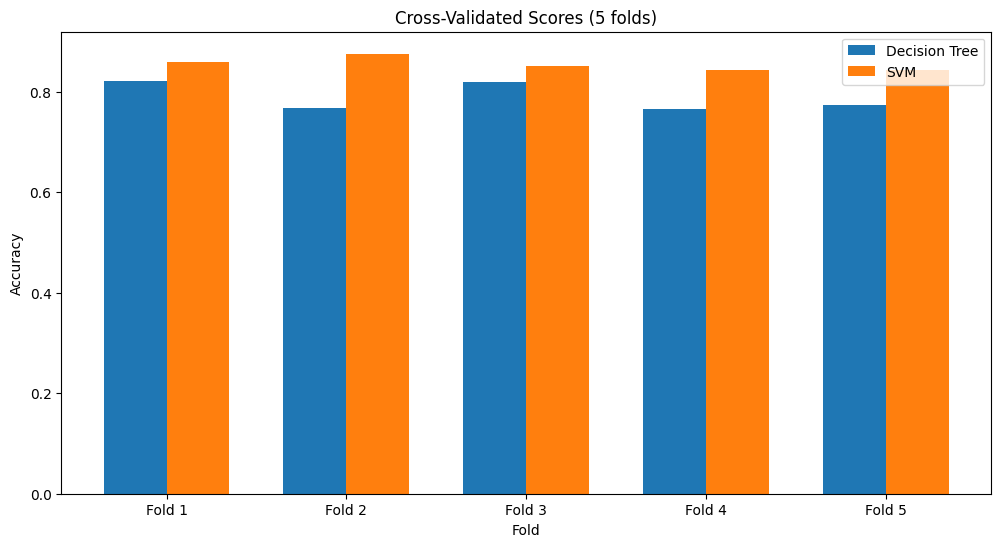

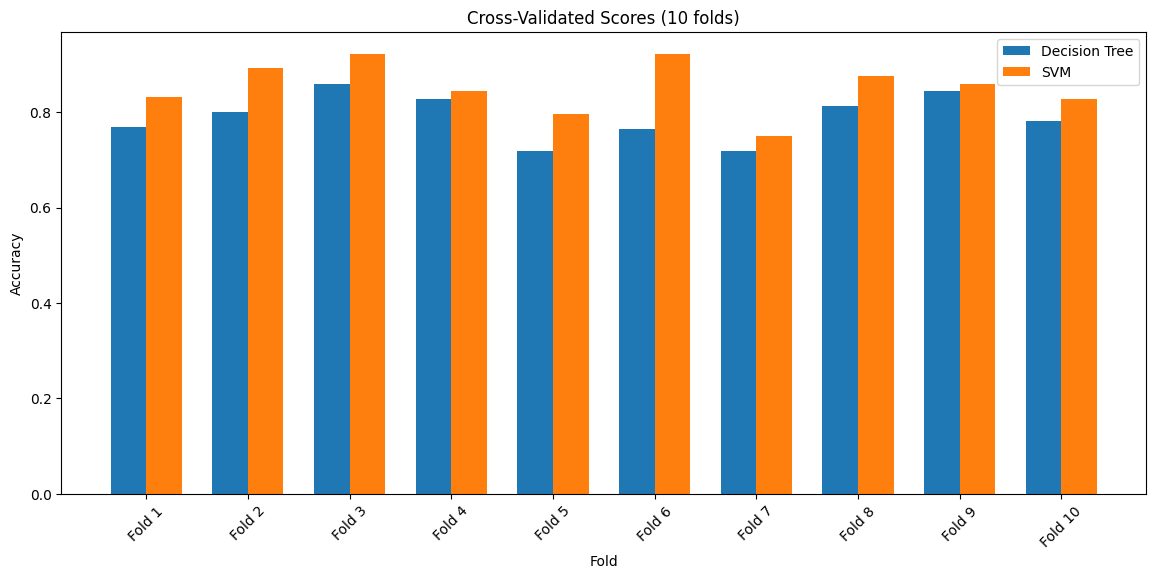

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data untuk 5-fold dan 10-fold
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
dt_scores_5 = [0.82170543, 0.76744186, 0.8203125, 0.765625, 0.7734375]
svm_scores_5 = [0.86046512, 0.87596899, 0.8515625, 0.84375, 0.84375]

folds_10 = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
dt_scores_10 = [0.76923077, 0.8, 0.859375, 0.828125, 0.71875, 0.765625, 0.71875, 0.8125, 0.84375, 0.78125]
svm_scores_10 = [0.83076923, 0.89230769, 0.921875, 0.84375, 0.796875, 0.921875, 0.75, 0.875, 0.859375, 0.828125]

# Plot 5-fold
plt.figure(figsize=(12, 6))
x = np.arange(len(folds))
width = 0.35

plt.bar(x - width/2, dt_scores_5, width, label='Decision Tree')
plt.bar(x + width/2, svm_scores_5, width, label='SVM')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validated Scores (5 folds)')
plt.xticks(x, folds)
plt.legend()
plt.show()

# Plot 10-fold
plt.figure(figsize=(14, 6))
x = np.arange(len(folds_10))
width = 0.35

plt.bar(x - width/2, dt_scores_10, width, label='Decision Tree')
plt.bar(x + width/2, svm_scores_10, width, label='SVM')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validated Scores (10 folds)')
plt.xticks(x, folds_10, rotation=45)
plt.legend()
plt.show()


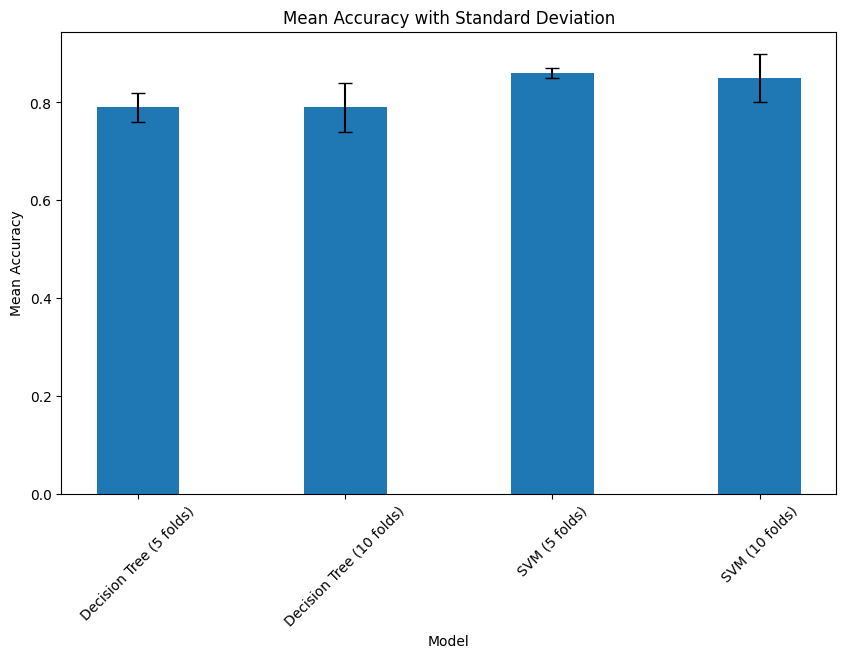

In [2]:
# Data Mean Accuracy dan Standard Deviation
models = ['Decision Tree (5 folds)', 'Decision Tree (10 folds)', 'SVM (5 folds)', 'SVM (10 folds)']
mean_accuracies = [0.79, 0.79, 0.86, 0.85]
std_devs = [0.03, 0.05, 0.01, 0.05]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.4

plt.bar(x, mean_accuracies, width, yerr=std_devs, capsize=5)

plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy with Standard Deviation')
plt.xticks(x, models, rotation=45)
plt.show()
